In [ ]:
# first load the dataset and check the contents to understand its structure and format.
import pandas as pd
#from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, RobustScaler, MinMaxScaler
from sklearn.impute import SimpleImputer

# Load the dataset
data = 'ames_housing.csv'
df = pd.read_csv(data)

# Display the first 10 rows of the dataset
df.head(10)

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
0,6,5,1080.0,Y,1656,215000
1,5,6,882.0,Y,896,105000
2,6,6,1329.0,Y,1329,172000
3,7,5,2110.0,Y,2110,244000
4,5,5,928.0,Y,1629,189900
5,6,6,926.0,Y,1604,195500
6,8,5,1338.0,Y,1338,213500
7,8,5,1280.0,Y,1280,191500
8,8,5,1595.0,Y,1616,236500
9,7,5,994.0,Y,1804,189000


Data Preprocessing.

In [ ]:
#Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

Overall Qual     0
Overall Cond     0
Total Bsmt SF    1
Central Air      0
Gr Liv Area      0
SalePrice        0
dtype: int64


In [ ]:
#handle missing value using simple imputer
imputer = SimpleImputer(strategy='mean')
df['Total Bsmt SF'] = imputer.fit_transform(df[['Total Bsmt SF']])

missing_values = df.isnull().sum()
print(missing_values)

Overall Qual     0
Overall Cond     0
Total Bsmt SF    0
Central Air      0
Gr Liv Area      0
SalePrice        0
dtype: int64


In [ ]:
# Column 'Central Air' has catorical values
#convert catogorical value into numerical using labelEncoder
label_encoder = LabelEncoder()
df['Central Air'] = label_encoder.fit_transform(df['Central Air'])

In [ ]:
# Check for any remaining missing values after imputation
missing_values = df.isnull().sum()
print(missing_values)

# Check the unique values of the encoded categorical variable 'Central Air'
central_air_encoded = df['Central Air'].unique()
print(central_air_encoded)

# Display first 10 rows of the dataset to verify changes
df_head = df.head(10)
df_head

Overall Qual     0
Overall Cond     0
Total Bsmt SF    0
Central Air      0
Gr Liv Area      0
SalePrice        0
dtype: int64
[1 0]


,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
0,6,5,1080.0,1,1656,215000
1,5,6,882.0,1,896,105000
2,6,6,1329.0,1,1329,172000
3,7,5,2110.0,1,2110,244000
4,5,5,928.0,1,1629,189900
5,6,6,926.0,1,1604,195500
6,8,5,1338.0,1,1338,213500
7,8,5,1280.0,1,1280,191500
8,8,5,1595.0,1,1616,236500
9,7,5,994.0,1,1804,189000


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.

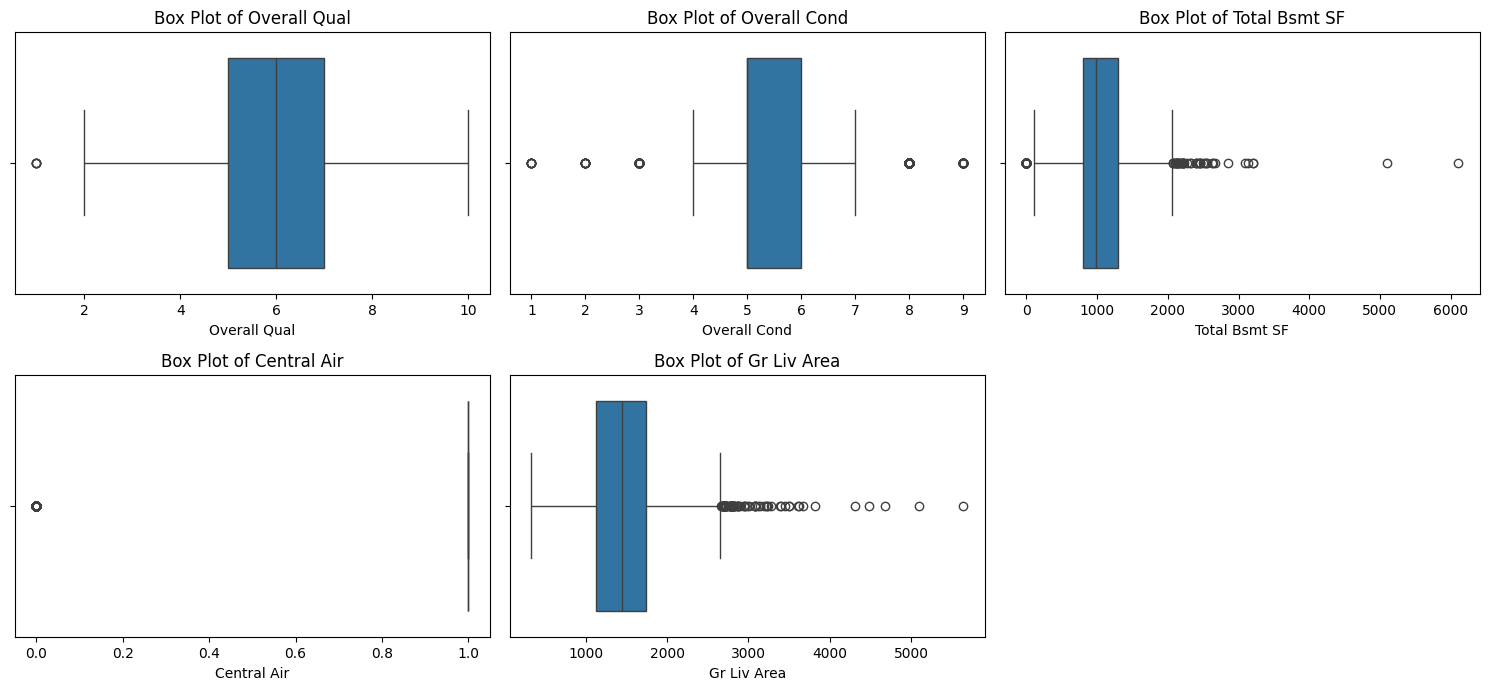

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Checking for outliers using box plots
# excuding target variable
features = df.columns.drop('SalePrice')
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}')

plt.tight_layout()  # Adjusts the layout to prevent overlap
plt.show()

1. Build a linear regression model from scratch. Using gradient descent with mini-batch for this purpose.
(resource used : class ppt & links provided in the ppt for advance learning)

In [ ]:
from sklearn.model_selection import train_test_split
# Split the dataset into training and testing sets before scaling
# Separate feature and target variable
X = df.drop(columns=['SalePrice'])
y = df['SalePrice']

# Split the dataset into training and testing sets before scaling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply scaling (RobustScaler) on the training data and then apply the same transformation to the test data
#as data contains outliers hence used robust scaling method.
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform on training data
X_test_scaled = scaler.transform(X_test)        # Only transform on testing data

# Display the preprocessed and scaled training features
print("First 10 rows of scaled training features:\n", pd.DataFrame(X_train_scaled, columns=X.columns).head(10))

# Define the variables to store costs
train_costs = []
test_costs = []



First 10 rows of scaled training features:
    Overall Qual  Overall Cond  Total Bsmt SF  Central Air  Gr Liv Area
0          -0.5           1.0       0.025845         -1.0     0.906452
1          -0.5           3.0       0.892644          0.0     0.053226
2           0.0           0.0      -0.347913          0.0     0.137097
3           1.0           0.0       0.403579          0.0    -0.401613
4           0.5           0.0       0.769384          0.0    -0.041935
5           0.0          -1.0       0.039761          0.0     1.241935
6          -0.5           0.0       0.272366          0.0    -0.508065
7           1.0           0.0       1.204771          0.0     0.332258
8           0.0          -2.0       2.081511          0.0     1.733871
9          -1.0           0.0       0.421471          0.0    -0.387097


In [ ]:
import numpy as np

# Mini-batch Gradient Descent Functions
def predict(x, w):
    return np.dot(x, w)

In [ ]:
def update_weights(x_batch, y_batch, weights, learning_rate):
    predictions = predict(x_batch, weights)
    delta_weight = (np.dot(x_batch.T, y_batch - predictions)) / x_batch.shape[0]
    weights += learning_rate * delta_weight
    return weights

In [ ]:
def compute_cost(x, y, weights):
    predictions = predict(x, weights)
    error = y - predictions
    return np.mean((error ** 2) / 2)

In [ ]:
def train_lr(x_train, y_train, x_test, y_test, max_iter, learning_rate, batch_size=32, fit_intercept=False):
    if fit_intercept:
        x0 = np.ones((x_train.shape[0], 1))
        x_train = np.hstack((x0, x_train))  # Adding intercept
        x0_test = np.ones((x_test.shape[0], 1))
        x_test = np.hstack((x0_test, x_test))  # Add intercept to test data

    weights = np.zeros(x_train.shape[1])  # Initialize weights
    num_samples = x_train.shape[0]
    num_batches = num_samples // batch_size + (num_samples % batch_size != 0)  # Handle last batch

    for epoch in range(max_iter):  # Run for a defined number of epochs
        # Shuffle the training data at the beginning of each epoch
        indices = np.random.permutation(num_samples)
        x_train_shuffled = x_train[indices]
        y_train_shuffled = y_train[indices]

        for i in range(num_batches):
            start = i * batch_size
            end = start + batch_size
            x_batch = x_train_shuffled[start:end]
            y_batch = y_train_shuffled[start:end]

            # Update weights based on each mini-batch
            weights = update_weights(x_batch, y_batch, weights, learning_rate)

        # Compute costs for both train and test set
        train_cost = compute_cost(x_train, y_train, weights)
        test_cost = compute_cost(x_test, y_test, weights)
        train_costs.append(train_cost)
        test_costs.append(test_cost)

        # Display cost once in every 100 iterations
        if epoch % 100 == 0:
            print(f"Cost at epoch {epoch}: Train Cost: {train_cost:.2f}, Test Cost: {test_cost:.2f}")

    return weights

def y_predict(x, weights):
  if x.shape[1] == weights.shape[0] - 1:
    intercept = np.ones((x.shape[0], 1))
    x = np.hstack((intercept, x))
  return predict(x, weights)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
# Train the model using mini-batch gradient descent and store costs
weights = train_lr(X_train_scaled, y_train.to_numpy(), X_test_scaled, y_test.to_numpy(), max_iter=2000, learning_rate=0.01, batch_size=32, fit_intercept=True)


# Make predictions
y_pred = y_predict(X_test_scaled, weights)

# Evaluate the performance
print(f"R2 Score: {r2_score(y_test, y_pred):.2f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")

Cost at epoch 0: Train Cost: 4423195887.52, Test Cost: 5126504215.79
Cost at epoch 100: Train Cost: 755264663.36, Test Cost: 746428181.19
Cost at epoch 200: Train Cost: 754656150.32, Test Cost: 750259221.77
Cost at epoch 300: Train Cost: 754949982.52, Test Cost: 759211673.53
Cost at epoch 400: Train Cost: 755385754.00, Test Cost: 756798984.24
Cost at epoch 500: Train Cost: 754724028.37, Test Cost: 753110062.95
Cost at epoch 600: Train Cost: 754731511.66, Test Cost: 756635505.07
Cost at epoch 700: Train Cost: 755056630.78, Test Cost: 760838918.70
Cost at epoch 800: Train Cost: 754730721.33, Test Cost: 749417116.80
Cost at epoch 900: Train Cost: 754664834.48, Test Cost: 748837720.18
Cost at epoch 1000: Train Cost: 754662725.68, Test Cost: 755915865.30
Cost at epoch 1100: Train Cost: 754821366.23, Test Cost: 747342005.58
Cost at epoch 1200: Train Cost: 754824732.83, Test Cost: 757224858.48
Cost at epoch 1300: Train Cost: 754662670.00, Test Cost: 751843165.10
Cost at epoch 1400: Train Cost

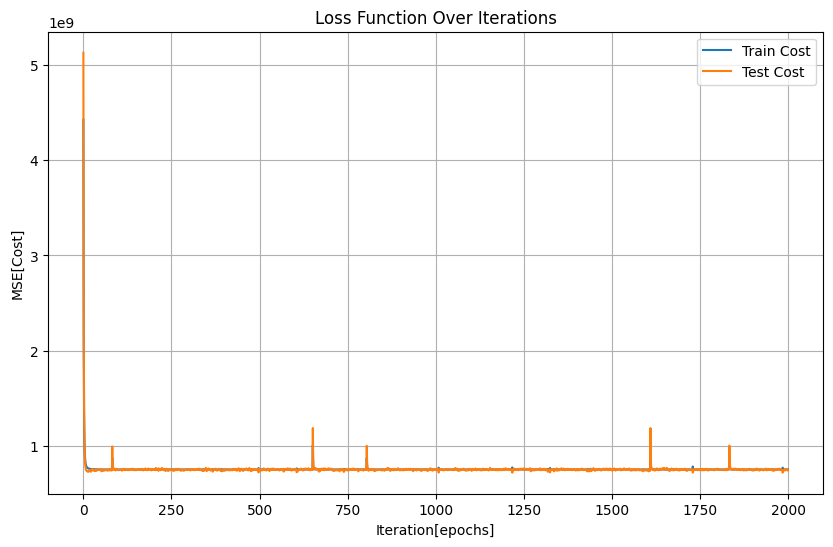

In [ ]:
# Plotting the loss function against the number of iterations
plt.figure(figsize=(10, 6))
plt.plot(range(len(train_costs)), train_costs, label='Train Cost')
plt.plot(range(len(test_costs)), test_costs, label='Test Cost')
plt.title('Loss Function Over Iterations')
plt.xlabel('Iteration[epochs]')
plt.ylabel('MSE[Cost]')
plt.legend()
plt.grid()
plt.show()


2. sklearn's LinearRegression algorithm to perform regression on the same dataset.reporting MSE and plot MSE vs. Iterations.

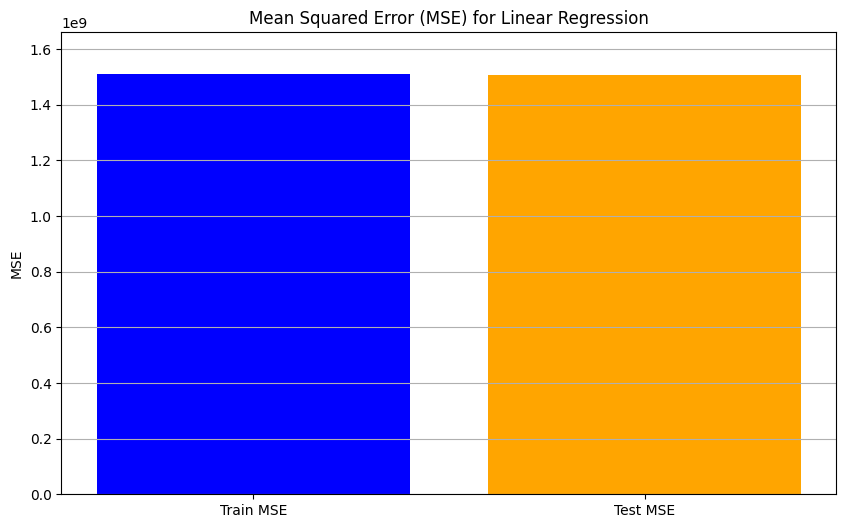

MSE-Train : 1509148398.3408568
MSE-Test : 1504823279.6176662


In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
linear_reg_model = LinearRegression()

# Fit the model on the scaled training data
linear_reg_model.fit(X_train_scaled, y_train)

# Make predictions on the training and test sets
y_train_pred = linear_reg_model.predict(X_train_scaled)
y_test_pred = linear_reg_model.predict(X_test_scaled)

# Calculate Mean Squared Error for both training and test sets
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Store MSEs for plotting
mse_values = [mse_train, mse_test]

# Plotting MSE vs. Iterations (in this case, we only have one iteration since LinearRegression fits in one step)
plt.figure(figsize=(10, 6))
plt.bar(['Train MSE', 'Test MSE'], mse_values, color=['blue', 'orange'])
plt.title('Mean Squared Error (MSE) for Linear Regression')
plt.ylabel('MSE')
plt.ylim(0, max(mse_values) * 1.1)
plt.grid(axis='y')
plt.show()

#mse_train, mse_test
print('MSE-Train :', mse_train)
print('MSE-Test :', mse_test)

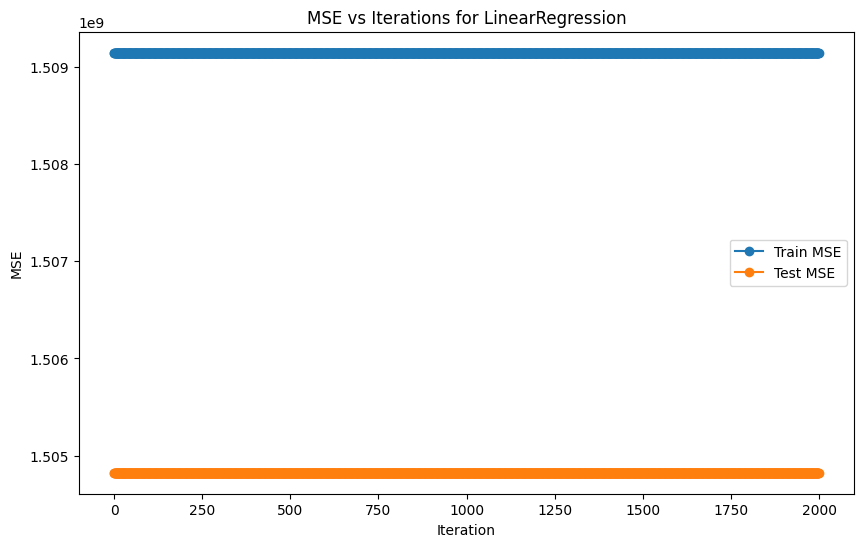

MSE-Train: 1509148398.3408566
MSE-test: 1504823279.6176686


In [ ]:
# plotting MSE vs. Iteration for max iteration = 2000 LinerRegression algorithm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize the LinearRegression model
model = LinearRegression()

num_iterations = 2000

# Track MSE for multiple random iterations
mse_train_list = []
mse_test_list = []

# Simulate different iterations by shuffling the training data and testing on it

for i in range(num_iterations):
    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate MSE for training and test sets
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)

    # Store the MSE values
    mse_train_list.append(mse_train)
    mse_test_list.append(mse_test)


# Plot MSE vs Iterations
plt.figure(figsize=(10, 6))
plt.plot(range(num_iterations), mse_train_list, label='Train MSE', marker='o')
plt.plot(range(num_iterations), mse_test_list, label='Test MSE', marker='o')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.title('MSE vs Iterations for LinearRegression')
plt.legend()
plt.show()

print('MSE-Train:', mse_train)
print('MSE-test:', mse_test)

3. Use KNeighborsRegressor and re-run the analysis. Use your train set to determine the optimum value of K. Re-train your model with K and use it to get the MSE for your test dataset. Report MSE and plot MSE vs. Iterations.

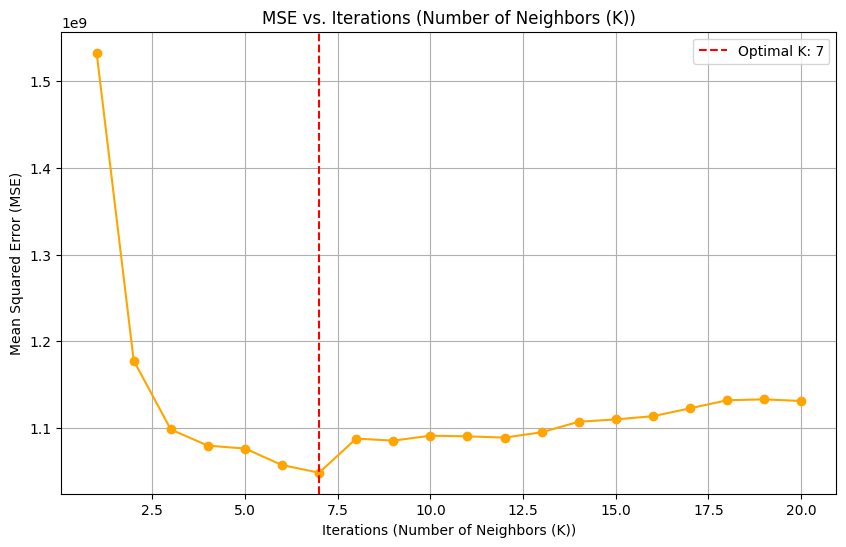

optimal value of k: 7
MSE-Test: 994538891.8456734


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

# Function to determine the optimal value of K
def find_best_k(X_train, y_train, max_k):
    mse_list = []
    for k in range(1, max_k + 1):
        knn_model = KNeighborsRegressor(n_neighbors=k)
        mse = -cross_val_score(knn_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error').mean()
        mse_list.append(mse)
    return mse_list

# Find the best K value
max_k = 20
mse_values = find_best_k(X_train_scaled, y_train, max_k)

# Determine the optimal K
optimal_k = np.argmin(mse_values) + 1  # +1 because k starts from 1

# Train the KNeighborsRegressor with the optimal K
knn_model = KNeighborsRegressor(n_neighbors=optimal_k)
knn_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_test_pred_knn = knn_model.predict(X_test_scaled)

# Calculate Mean Squared Error for the test set
mse_test_knn = mean_squared_error(y_test, y_test_pred_knn)

# Plotting MSE vs. K values
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_k + 1), mse_values, marker='o', color='orange')
plt.axvline(x=optimal_k, color='red', linestyle='--', label=f'Optimal K: {optimal_k}')
plt.title('MSE vs. Iterations (Number of Neighbors (K))')
plt.xlabel('Iterations (Number of Neighbors (K))')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.grid()
plt.show()


print('optimal value of k:', optimal_k)
print('MSE-Test:', mse_test_knn)
